In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import pickle
#import matrix_factorization_utilities
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [2]:
ratings =pd.read_csv('ratings.csv')

In [3]:
len(ratings)

26024289

In [4]:
ratings = ratings.iloc[0:100000]

In [5]:
ratings.head(5001)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
4996,49,2502,4.5,1149447427
4997,49,2571,5.0,1149444885
4998,49,2617,5.0,1149447609
4999,49,2628,4.0,1149446546


In [6]:
#Just taking the required columns
ratings = ratings[['userId', 'movieId','rating']]

In [7]:
len(ratings)

100000

In [8]:
ratings_df = ratings.groupby(['userId','movieId']).aggregate(np.max)

In [9]:
# In this case there are no such cases where the user has rated the same movie twice.
len(ratings_df)

100000

In [10]:
# Inspecting the data
ratings.head()

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [11]:
ratings_df.head()

rating
userId movieId        
1      110         1.0
       147         4.5
       858         5.0
       1221        5.0
       1246        5.0

In [12]:
len(ratings['userId'].unique())

1014

In [13]:
#Getting the percentage count of each rating value 
count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)

In [14]:
count_ratings

,userId,movieId,perc_total
rating,,,
0.5,1034,1034,1.0
1.0,2747,2747,2.7
1.5,1342,1342,1.3
2.0,7214,7214,7.2
2.5,5245,5245,5.2
3.0,21756,21756,21.8
3.5,11660,11660,11.7
4.0,27240,27240,27.2
4.5,7979,7979,8.0


<AxesSubplot:xlabel='rating'>

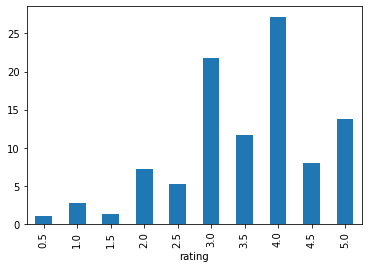

In [15]:
#Visualising the percentage total for each rating
count_ratings['perc_total'].plot.bar()

In [16]:
#reading the movies dataset
movie_list = pd.read_csv('old dataset/movies.csv')

In [17]:
movie_list = movie_list.iloc[0:27278]

In [18]:
len(movie_list)

27278

In [19]:
len(movie_list)

27278

In [20]:
# insepcting the movie list dataframe
movie_list.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
# reading the tags datast
tags = pd.read_csv('old dataset/tags.csv')

In [22]:
tags = tags.iloc[0:99999]

In [23]:
len(tags)

99999

In [24]:
# inspecting the tags data frame
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [25]:
# inspecting various genres
genres = movie_list['genres']

In [26]:
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [27]:
genre_list = ""
for index,row in movie_list.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['IMAX',
 'Children',
 'Comedy',
 'Sci-Fi',
 'Crime',
 'Action',
 'Mystery',
 'Drama',
 'Animation',
 'Romance',
 'Horror',
 'War',
 'Documentary',
 'Western',
 'Film-Noir',
 'Fantasy',
 '(no genres listed)',
 'Musical',
 'Adventure',
 'Thriller']

In [28]:
#Enriching the movies dataset by adding the various genres columns.
movies_with_genres = movie_list.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [29]:
movies_with_genres.head()

,movieId,title,genres,IMAX,Children,Comedy,Sci-Fi,Crime,Action,Mystery,...,Horror,War,Documentary,Western,Film-Noir,Fantasy,(no genres listed),Musical,Adventure,Thriller
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Calculating the sparsity
no_of_users = len(ratings['userId'].unique())
no_of_movies = len(ratings['movieId'].unique())

sparsity = round(1.0 - len(ratings)/(1.0*(no_of_movies*no_of_users)),3)
print(sparsity)

0.989


In [31]:
# Counting the number of unique movies in the dataset.
len(ratings['movieId'].unique())

8832

In [32]:
# Finding the average rating for movie and the number of ratings for each movie
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
# avg_movie_rating['movieId']= avg_movie_rating.index

In [33]:
# inspecting the average movie rating data frame
avg_movie_rating.head()

,mean,count
movieId,,
1,3.905172,290
2,3.158654,104
3,3.157895,57
4,2.464286,14
5,3.076271,59


In [34]:
len(avg_movie_rating)

8832

In [35]:
#calculate the percentile count. It gives the no of ratings at least 70% of the movies have
np.percentile(avg_movie_rating['count'],70)

7.0

In [36]:
#Get the average movie rating across all movies 
avg_rating_all=ratings['rating'].mean()
avg_rating_all
#set a minimum threshold for 15 number of reviews that the movie has to have
min_reviews=30

min_reviews
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count
movieId,,
1,3.905172,290
2,3.158654,104
3,3.157895,57
5,3.076271,59
6,3.861607,112


In [37]:
len(movie_score)

868

In [38]:
#create a function for weighted rating score based off count of reviews
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [39]:

#Calculating the weighted score for each movie
movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)
movie_score.head()

C:\Users\user\AppData\Local\Temp/ipykernel_6192/3455039159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)


,mean,count,weighted_score
movieId,,,
1,3.905172,290,3.869696
2,3.158654,104,3.241066
3,3.157895,57,3.285090
5,3.076271,59,3.228121
6,3.861607,112,3.790865


In [40]:
#join movie details to movie ratings
movies_with_genres.index.name = None#.drop(columns=[])#, axis = 1)
movies_with_genres = movies_with_genres.rename_axis(None) 
movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')
#movie_score = movie_score.index.name = NULL
#join movie links to movie ratings
#movie_score = pd.merge(movie_score,links,on='movieId')
movie_score.head()

,movieId,mean,count,weighted_score,title,genres,IMAX,Children,Comedy,Sci-Fi,...,Horror,War,Documentary,Western,Film-Noir,Fantasy,(no genres listed),Musical,Adventure,Thriller
0,1,3.905172,290,3.869696,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1,2,3.158654,104,3.241066,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,3.157895,57,3.285090,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,3.076271,59,3.228121,Father of the Bride Part II (1995),Comedy,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.861607,112,3.790865,Heat (1995),Action|Crime|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
pd.DataFrame(movie_score.sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score','genres']][:10])

,title,count,mean,weighted_score,genres
193,"Godfather, The (1972)",225,4.451111,4.342364,Crime|Drama
89,"Shawshank Redemption, The (1994)",362,4.388122,4.322201,Crime|Drama
25,"Usual Suspects, The (1995)",243,4.314815,4.228215,Crime|Mystery|Thriller
82,Pulp Fiction (1994),341,4.260997,4.201625,Comedy|Crime|Drama|Thriller
248,One Flew Over the Cuckoo's Nest (1975),162,4.290123,4.170848,Drama
486,"Matrix, The (1999)",309,4.229773,4.167560,Action|Sci-Fi|Thriller
266,"Godfather: Part II, The (1974)",163,4.248466,4.136284,Crime|Drama
139,Schindler's List (1993),251,4.205179,4.132750,Drama|War
254,"Good, the Bad and the Ugly, The (Buono, il bru...",84,4.345238,4.129849,Action|Adventure|Western
156,"Silence of the Lambs, The (1991)",323,4.181115,4.125504,Crime|Horror|Thriller


In [42]:
# Gives the best movies according to genre based on weighted score which is calculated using IMDB formula
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score']][:top_n])

In [43]:
#run function to return top recommended movies by genre
best_movies_by_genre('Musical',10)  

,title,count,mean,weighted_score
204,"Wizard of Oz, The (1939)",106,4.004717,3.899285
195,Singin' in the Rain (1952),40,4.125000,3.868611
105,"Lion King, The (1994)",177,3.867232,3.817888
215,Mary Poppins (1964),59,3.847458,3.739357
203,My Fair Lady (1964),40,3.837500,3.704326
265,"Blues Brothers, The (1980)",87,3.764368,3.703443
218,"Sound of Music, The (1965)",55,3.790909,3.697680
217,Alice in Wonderland (1951),41,3.792683,3.680321
152,Aladdin (1992),205,3.692683,3.671501
225,Willy Wonka & the Chocolate Factory (1971),127,3.688976,3.657980


In [44]:
#run function to return top recommended movies by genre
best_movies_by_genre('Action',10)  

,title,count,mean,weighted_score
486,"Matrix, The (1999)",309,4.229773,4.167560
254,"Good, the Bad and the Ugly, The (Buono, il bru...",84,4.345238,4.129849
538,Fight Club (1999),229,4.192140,4.115069
72,Star Wars: Episode IV - A New Hope (1977),306,4.153595,4.097627
249,Star Wars: Episode V - The Empire Strikes Back...,246,4.166667,4.097112
709,City of God (Cidade de Deus) (2002),84,4.261905,4.068446
143,Blade Runner (1982),150,4.150000,4.046127
259,Apocalypse Now (1979),101,4.183168,4.032846
730,"Lord of the Rings: The Return of the King, The...",203,4.103448,4.029197
412,Seven Samurai (Shichinin no samurai) (1954),68,4.235294,4.018396


In [45]:
#run function to return top recommended movies by genre
best_movies_by_genre('Children',10)  

,title,count,mean,weighted_score
808,WALL·E (2008),104,4.014423,3.905245
242,Wallace & Gromit: The Wrong Trousers (1993),62,4.080645,3.900030
204,"Wizard of Oz, The (1939)",106,4.004717,3.899285
0,Toy Story (1995),290,3.905172,3.869696
209,It's a Wonderful Life (1946),69,4.007246,3.861644
176,Wallace & Gromit: A Close Shave (1995),45,4.066667,3.850704
105,"Lion King, The (1994)",177,3.867232,3.817888
819,Up (2009),90,3.911111,3.815023
557,Toy Story 2 (1999),121,3.880165,3.809952
671,"Monsters, Inc. (2001)",133,3.845865,3.787134


In [46]:
#run function to return top recommended movies by genre
best_movies_by_genre('Drama',10)  

,title,count,mean,weighted_score
193,"Godfather, The (1972)",225,4.451111,4.342364
89,"Shawshank Redemption, The (1994)",362,4.388122,4.322201
82,Pulp Fiction (1994),341,4.260997,4.201625
248,One Flew Over the Cuckoo's Nest (1975),162,4.290123,4.170848
266,"Godfather: Part II, The (1974)",163,4.248466,4.136284
139,Schindler's List (1993),251,4.205179,4.132750
538,Fight Club (1999),229,4.192140,4.115069
261,Goodfellas (1990),126,4.250000,4.110915
161,Fargo (1996),193,4.189119,4.100013
709,City of God (Cidade de Deus) (2002),84,4.261905,4.068446


In [47]:
# Creating a data frame that has user ratings accross all movies in form of matrix used in matrix factorisation
ratings_df = pd.pivot_table(ratings, index='userId', columns='movieId', aggfunc=np.max)

In [48]:
ratings_df.head()

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          NaN    NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN   

         ...                                                                 \
movieId  ... 173209 173291 173353 174055 174231 174393 174585 174843 175579   
userId   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 176271  
userId          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  

[5 rows x 8832 columns]

In [49]:
ratings_df

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          NaN    NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1010       4.0    NaN    2.0    NaN    NaN    3.0    NaN    NaN    1.0    3.0   
1011       4.0    3.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1012       NaN    3.0    NaN    NaN    NaN    5.0    NaN    NaN    NaN    3.0   
1013       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1014       NaN    NaN    NaN    NaN    NaN    3.0    NaN    NaN    NaN    NaN   

         ...                                                                 \
movieId  ... 173209 173291 173353 174055 174231 174393 174585 174843 175579   
userId   ...                                                                  
1        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1010     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1011     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1012     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1013     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1014     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                
movieId 176271  
userId          
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
...        ...  
1010       NaN  
1011       NaN  
1012       NaN  
1013       NaN  
1014       NaN  

[1014 rows x 8832 columns]

In [50]:
#merging ratings and movies dataframes
ratings_movies = pd.merge(ratings,movie_list, on = 'movieId')

In [51]:
ratings_movies.head()

,userId,movieId,rating,title,genres
0,1,110,1.0,Braveheart (1995),Action|Drama|War
1,11,110,3.5,Braveheart (1995),Action|Drama|War
2,22,110,5.0,Braveheart (1995),Action|Drama|War
3,24,110,5.0,Braveheart (1995),Action|Drama|War
4,29,110,3.0,Braveheart (1995),Action|Drama|War


In [52]:
ratings_movies

,userId,movieId,rating,title,genres
0,1,110,1.0,Braveheart (1995),Action|Drama|War
1,11,110,3.5,Braveheart (1995),Action|Drama|War
2,22,110,5.0,Braveheart (1995),Action|Drama|War
3,24,110,5.0,Braveheart (1995),Action|Drama|War
4,29,110,3.0,Braveheart (1995),Action|Drama|War
...,...,...,...,...,...
98432,999,3872,4.0,"Suddenly, Last Summer (1959)",Drama
98433,1002,117871,3.0,"Water Diviner, The (2014)",Action|Drama|War
98434,1010,478,1.0,Jimmy Hollywood (1994),Comedy|Crime|Drama
98435,1012,1114,4.0,"Funeral, The (1996)",Crime|Drama


In [53]:
#Gets the other top 10 movies which are watched by the people who saw this particular movie
def get_other_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = ratings_movies.loc[ratings_movies['title']==movie_name]['userId']
    #convert to a data frame
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,ratings_movies,on='userId')
    #get a list of the most commonly watched movies by these other user
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[:10]

In [54]:
# Getting other top 10 movies which are watched by the people who saw 'Gone Girl'
get_other_movies('Gone Girl (2014)')

,userId,perc_who_watched
title,,
Gone Girl (2014),36,100.0
Inception (2010),30,83.3
"Shawshank Redemption, The (1994)",30,83.3
"Dark Knight, The (2008)",28,77.8
"Lord of the Rings: The Return of the King, The (2003)",28,77.8
"Lord of the Rings: The Fellowship of the Ring, The (2001)",28,77.8
"Matrix, The (1999)",26,72.2
WALL·E (2008),26,72.2
"Lord of the Rings: The Two Towers, The (2002)",25,69.4


##using KNN CLUSTERING

In [55]:
from sklearn.neighbors import NearestNeighbors


In [56]:
avg_movie_rating.head()

,mean,count
movieId,,
1,3.905172,290
2,3.158654,104
3,3.157895,57
4,2.464286,14
5,3.076271,59


In [57]:
#only include movies with more than 10 ratings
movie_plus_10_ratings = avg_movie_rating.loc[avg_movie_rating['count']>=10]
print(len(movie_plus_10_ratings))

2160


In [58]:
movie_plus_10_ratings

,mean,count
movieId,,
1,3.905172,290
2,3.158654,104
3,3.157895,57
4,2.464286,14
5,3.076271,59
...,...,...
150548,4.100000,10
152081,3.763158,19
164179,4.071429,14


In [59]:
filtered_ratings = pd.merge(movie_plus_10_ratings, ratings, on="movieId")
len(filtered_ratings)

82304

In [60]:
filtered_ratings.head()

,movieId,mean,count,userId,rating
0,1,3.905172,290,8,4.0
1,1,3.905172,290,9,4.5
2,1,3.905172,290,12,4.0
3,1,3.905172,290,20,4.0
4,1,3.905172,290,24,4.0


In [61]:
#create a matrix table with movieIds on the rows and userIds in the columns.
#replace NAN values with 0
movie_wide = filtered_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_wide.head()

userId,1,2,3,4,5,6,7,8,9,10,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#specify model parameters
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
#fit model to the data set
model_knn.fit(movie_wide)

NearestNeighbors(algorithm='brute', metric='cosine')

In [63]:

#Gets the top 10 nearest neighbours got the movie
def print_similar_movies(query_index) :
    #get the list of user ratings for a specific userId
    query_index_movie_ratings = movie_wide.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 11) 
    #write a loop that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_movie = movie_list.loc[movie_list['movieId']==query_index]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_movie))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_movie = movie_list.loc[movie_list['movieId']==movie_wide.iloc[indices_flat,:].name]['title']
            #print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))

In [64]:
print_similar_movies(112552)

Recommendations for 21857    Whiplash (2014)
Name: title, dtype: object:

1: 21859    Gone Girl (2014)
Name: title, dtype: object, with distance of 0.5255540358244131:
2: 20651    Wolf of Wall Street, The (2013)
Name: title, dtype: object, with distance of 0.5331336654822003:
3: 22566    Nightcrawler (2014)
Name: title, dtype: object, with distance of 0.5391187717020907:
4: 19021    Django Unchained (2012)
Name: title, dtype: object, with distance of 0.5397071545824157:
5: 20523    Dallas Buyers Club (2013)
Name: title, dtype: object, with distance of 0.5400680266349488:
6: 20247    Gravity (2013)
Name: title, dtype: object, with distance of 0.55264121806362:
7: 17674    Intouchables (2011)
Name: title, dtype: object, with distance of 0.5590868091287351:
8: Series([], Name: title, dtype: object), with distance of 0.5631949964674041:
9: 21759    Birdman: Or (The Unexpected Virtue of Ignoranc...
Name: title, dtype: object, with distance of 0.5660897153688289:
10: 21789    Boyhood (2014)


In [65]:
print_similar_movies(1)

Recommendations for 0    Toy Story (1995)
Name: title, dtype: object:

1: 764    Independence Day (a.k.a. ID4) (1996)
Name: title, dtype: object, with distance of 0.42772165433027987:
2: 637    Mission: Impossible (1996)
Name: title, dtype: object, with distance of 0.4503092876414645:
3: 3021    Toy Story 2 (1999)
Name: title, dtype: object, with distance of 0.4503290618110636:
4: 257    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, with distance of 0.45739630394018416:
5: 1237    Back to the Future (1985)
Name: title, dtype: object, with distance of 0.45819955305368854:
6: 1179    Star Wars: Episode VI - Return of the Jedi (1983)
Name: title, dtype: object, with distance of 0.46246430229204294:
7: 475    Jurassic Park (1993)
Name: title, dtype: object, with distance of 0.464102832759943:
8: 351    Forrest Gump (1994)
Name: title, dtype: object, with distance of 0.46829842455750714:
9: 2480    Matrix, The (1999)
Name: title, dtype: object, with distance of 0.474

In [66]:
print_similar_movies(96079)

Recommendations for 18337    Skyfall (2012)
Name: title, dtype: object:

1: Series([], Name: title, dtype: object), with distance of 0.37589892278603787:
2: 14628    Iron Man 2 (2010)
Name: title, dtype: object, with distance of 0.4249659492774984:
3: 11207    Casino Royale (2006)
Name: title, dtype: object, with distance of 0.45343968769437637:
4: 14477    How to Train Your Dragon (2010)
Name: title, dtype: object, with distance of 0.4543333030398363:
5: 19807    Now You See Me (2013)
Name: title, dtype: object, with distance of 0.457038701145134:
6: 14735    Prince of Persia: The Sands of Time (2010)
Name: title, dtype: object, with distance of 0.46116292649104074:
7: 16440    Pirates of the Caribbean: On Stranger Tides (2...
Name: title, dtype: object, with distance of 0.461908432645319:
8: 12758    Quantum of Solace (2008)
Name: title, dtype: object, with distance of 0.47355661927806914:
9: 17317    Hugo (2011)
Name: title, dtype: object, with distance of 0.47607854672909466:
10: 1

In [67]:
movies_with_genres.head()

,movieId,title,genres,IMAX,Children,Comedy,Sci-Fi,Crime,Action,Mystery,...,Horror,War,Documentary,Western,Film-Noir,Fantasy,(no genres listed),Musical,Adventure,Thriller
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#Getting the movies list with only genres like Musical and other such columns
movie_content_df_temp = movies_with_genres.copy()
movie_content_df_temp.set_index('movieId')
movie_content_df = movie_content_df_temp.drop(columns = ['movieId','title','genres'])
#movie_content_df = movie_content_df.as_matrix()
movie_content_df

,IMAX,Children,Comedy,Sci-Fi,Crime,Action,Mystery,Drama,Animation,Romance,Horror,War,Documentary,Western,Film-Noir,Fantasy,(no genres listed),Musical,Adventure,Thriller
0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [69]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(movie_content_df,movie_content_df)

In [70]:
# Similarity of the movies based on the content
cosine_sim

array([[5., 3., 1., ..., 0., 0., 0.],
       [3., 3., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [71]:
indicies = pd.Series(movie_content_df_temp.index, movie_content_df_temp['title'])
indicies 

title
Toy Story (1995)                          0
Jumanji (1995)                            1
Grumpier Old Men (1995)                   2
Waiting to Exhale (1995)                  3
Father of the Bride Part II (1995)        4
                                      ...  
La Tribu (1991)                       27273
Blue Hell (1986)                      27274
Spy, Stand Up (1982)                  27275
The Boy Soldier (1981)                27276
La clé sur la porte (1978)            27277
Length: 27278, dtype: int64

In [72]:
#Gets the top 10 similar movies based on the content
def get_similar_movies_based_on_content(movie_index) :
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:11]
    print(sim_scores)
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print(movie_indices)
    similar_movies = pd.DataFrame(movie_content_df_temp[['title','genres']].iloc[movie_indices])
    return similar_movies

In [73]:
indicies["Skyfall (2012)"]

18337

In [74]:
get_similar_movies_based_on_content(18337)

[(6247, 4.0), (6809, 4.0), (10802, 4.0), (11561, 4.0), (14628, 4.0), (16029, 4.0), (17467, 4.0), (17501, 4.0), (18337, 4.0), (19422, 4.0), (9, 3.0)]
[6247, 6809, 10802, 11561, 14628, 16029, 17467, 17501, 18337, 19422, 9]


,title,genres
6247,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
6809,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
10802,Poseidon (2006),Action|Adventure|Thriller|IMAX
11561,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX
14628,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
16029,Sanctum (2011),Action|Adventure|Drama|Thriller|IMAX
17467,"Bourne Legacy, The (2012)",Action|Adventure|Drama|Thriller|IMAX
17501,Mission: Impossible - Ghost Protocol (2011),Action|Adventure|Thriller|IMAX
18337,Skyfall (2012),Action|Adventure|Thriller|IMAX
19422,G.I. Joe: Retaliation (2013),Action|Adventure|Sci-Fi|Thriller|IMAX


In [177]:
get_similar_movies_based_on_content(19338)

[(5270, 3.0), (6247, 3.0), (6809, 3.0), (7923, 3.0), (10802, 3.0), (10890, 3.0), (11561, 3.0), (11948, 3.0), (12751, 3.0), (13285, 3.0), (13460, 3.0)]
[5270, 6247, 6809, 7923, 10802, 10890, 11561, 11948, 12751, 13285, 13460]


,title,genres
5270,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
6247,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
6809,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
7923,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
10802,Poseidon (2006),Action|Adventure|Thriller|IMAX
10890,Superman Returns (2006),Action|Adventure|Sci-Fi|IMAX
11561,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX
11948,Beowulf (2007),Action|Adventure|Animation|Fantasy|IMAX
12751,Madagascar: Escape 2 Africa (2008),Action|Adventure|Animation|Children|Comedy|IMAX
13285,Star Trek (2009),Action|Adventure|Sci-Fi|IMAX


In [178]:
#get ordered list of movieIds
item_indices = pd.DataFrame(sorted(list(set(ratings['movieId']))),columns=['movieId'])
#add in data frame index value to data frame
item_indices['movie_index']=item_indices.index
#inspect data frame
item_indices.head()

,movieId,movie_index
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4


In [179]:
#get ordered list of movieIds
user_indices = pd.DataFrame(sorted(list(set(ratings['userId']))),columns=['userId'])
#add in data frame index value to data frame
user_indices['user_index']=user_indices.index
#inspect data frame
user_indices.head()

,userId,user_index
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4


In [180]:
#join the movie indices
df_with_index = pd.merge(ratings,item_indices,on='movieId')
#join the user indices
df_with_index=pd.merge(df_with_index,user_indices,on='userId')
#inspec the data frame
df_with_index.head()

,userId,movieId,rating,movie_index,user_index
0,1,110,1.0,95,0
1,1,147,4.5,117,0
2,1,858,5.0,666,0
3,1,1221,5.0,932,0
4,1,1246,5.0,955,0


In [181]:
#import train_test_split module
from sklearn.model_selection import train_test_split
#take 80% as the training set and 20% as the test set
df_train, df_test= train_test_split(df_with_index,test_size=0.2)
print(len(df_train))
print(len(df_test))

80000
20000


In [182]:
df_train.head()

,userId,movieId,rating,movie_index,user_index
94749,863,940,3.0,727,862
82685,283,2431,4.5,1851,282
70305,625,8121,5.0,4926,624
95307,322,1223,5.0,934,321
60964,174,1241,5.0,950,173


In [183]:
df_test.head()

,userId,movieId,rating,movie_index,user_index
64455,376,69481,4.0,6707,375
57529,1010,1097,3.0,844,1009
46638,836,82852,3.0,7162,835
39206,741,5980,4.0,4126,740
91327,518,765,2.0,612,517


In [184]:
n_users = ratings.userId.unique().shape[0]
n_items = ratings.movieId.unique().shape[0]
print(n_users)
print(n_items)

1014
8832


In [185]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
    #for every line in the data
for line in df_train.itertuples():
    #set the value in the column and row to 
    #line[1] is userId, line[2] is movieId and line[3] is rating, line[4] is movie_index and line[5] is user_index
    train_data_matrix[line[5], line[4]] = line[3]
train_data_matrix.shape

(1014, 8832)

In [186]:
#Create two user-item matrices, one for training and another for testing
test_data_matrix = np.zeros((n_users, n_items))
    #for every line in the data
for line in df_test[:1].itertuples():
    #set the value in the column and row to 
    #line[1] is userId, line[2] is movieId and line[3] is rating, line[4] is movie_index and line[5] is user_index
    #print(line[2])
    test_data_matrix[line[5], line[4]] = line[3]
    #train_data_matrix[line['movieId'], line['userId']] = line['rating']
test_data_matrix.shape

(1014, 8832)

In [187]:
pd.DataFrame(train_data_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,8822,8823,8824,8825,8826,8827,8828,8829,8830,8831
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
df_train['rating'].max()

5.0

In [189]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    #select prediction values that are non-zero and flatten into 1 array
    prediction = prediction[ground_truth.nonzero()].flatten() 
    #select test values that are non-zero and flatten into 1 array
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    #return RMSE between values
    return sqrt(mean_squared_error(prediction, ground_truth))

In [190]:
#Calculate the rmse sscore of SVD using different values of k (latent features)
rmse_list = []
for i in [1,2,5,20,40,60,100,200]:
    #apply svd to the test data
    u,s,vt = svds(train_data_matrix,k=i)
    #get diagonal matrix
    s_diag_matrix=np.diag(s)
    #predict x with dot product of u s_diag and vt
    X_pred = np.dot(np.dot(u,s_diag_matrix),vt)
    #calculate rmse score of matrix factorisation predictions
    rmse_score = rmse(X_pred,test_data_matrix)
    rmse_list.append(rmse_score)
    print("Matrix Factorisation with " + str(i) +" latent features has a RMSE of " + str(rmse_score))

Matrix Factorisation with 1 latent features has a RMSE of 3.74748169768642
Matrix Factorisation with 2 latent features has a RMSE of 3.3372457307829584
Matrix Factorisation with 5 latent features has a RMSE of 3.1590716661855787
Matrix Factorisation with 20 latent features has a RMSE of 3.6605129090683772
Matrix Factorisation with 40 latent features has a RMSE of 3.783427325284458
Matrix Factorisation with 60 latent features has a RMSE of 3.767684895645203
Matrix Factorisation with 100 latent features has a RMSE of 3.868554604096513
Matrix Factorisation with 200 latent features has a RMSE of 4.095093000227285


In [191]:
#Convert predictions to a DataFrame
mf_pred = pd.DataFrame(X_pred)
mf_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,8822,8823,8824,8825,8826,8827,8828,8829,8830,8831
0,0.127268,-0.007925,0.005790,-0.055467,0.045526,-0.187980,0.025988,-0.006668,0.028671,-0.197151,...,-0.022210,0.0,-0.002445,-0.018454,-0.014353,-0.002445,-0.003610,-0.002037,-0.001832,0.0
1,0.549313,0.044410,0.532559,-0.015594,0.541634,0.663341,0.452636,0.031778,0.206733,0.036120,...,-0.009334,0.0,-0.000687,0.005425,0.004220,-0.000687,-0.000070,-0.000573,0.004757,0.0
2,0.054813,0.051611,-0.085890,-0.035553,-0.029977,0.092557,0.019165,0.028746,0.042079,0.040423,...,0.001128,0.0,-0.000549,0.002100,0.001633,-0.000549,-0.005259,-0.000458,0.004754,0.0
3,0.417526,-0.402428,-0.170051,-0.042594,-0.195255,-0.517114,-0.134698,-0.017937,0.046286,-0.163553,...,-0.032451,0.0,0.003460,0.066696,0.051875,0.003460,-0.014658,0.002883,0.016185,0.0
4,0.309246,-0.294873,-0.297842,-0.014581,-0.025444,0.066208,0.247630,0.013784,0.039118,0.360807,...,0.038408,0.0,0.009515,-0.003653,-0.002842,0.009515,-0.006008,0.007929,-0.027712,0.0


In [192]:
df_names = pd.merge(ratings,movie_list,on='movieId')
df_names.head()

,userId,movieId,rating,title,genres
0,1,110,1.0,Braveheart (1995),Action|Drama|War
1,11,110,3.5,Braveheart (1995),Action|Drama|War
2,22,110,5.0,Braveheart (1995),Action|Drama|War
3,24,110,5.0,Braveheart (1995),Action|Drama|War
4,29,110,3.0,Braveheart (1995),Action|Drama|War


In [193]:
#choose a user ID
user_id = 1
#get movies rated by this user id
users_movies = df_names.loc[df_names["userId"]==user_id]
#print how many ratings user has made 
print("User ID : " + str(user_id) + " has already rated " + str(len(users_movies)) + " movies")
#list movies that have been rated
users_movies

User ID : 1 has already rated 27 movies


,userId,movieId,rating,title,genres
0,1,110,1.0,Braveheart (1995),Action|Drama|War
248,1,147,4.5,"Basketball Diaries, The (1995)",Drama
274,1,858,5.0,"Godfather, The (1972)",Crime|Drama
499,1,1221,5.0,"Godfather: Part II, The (1974)",Crime|Drama
662,1,1246,5.0,Dead Poets Society (1989),Drama
769,1,1968,4.0,"Breakfast Club, The (1985)",Comedy|Drama
878,1,2762,4.5,"Sixth Sense, The (1999)",Drama|Horror|Mystery
1076,1,2918,5.0,Ferris Bueller's Day Off (1986),Comedy
1200,1,2959,4.0,Fight Club (1999),Action|Crime|Drama|Thriller
1429,1,4226,4.0,Memento (2000),Mystery|Thriller


In [194]:
user_index = df_train.loc[df_train["userId"]==user_id]['user_index'][:1].values[0]
#get movie ratings predicted for this user and sort by highest rating prediction
sorted_user_predictions = pd.DataFrame(mf_pred.iloc[user_index].sort_values(ascending=False))
#rename the columns
sorted_user_predictions.columns=['ratings']
#save the index values as movie id
sorted_user_predictions['movieId']=sorted_user_predictions.index
print("Top 10 predictions for User " + str(user_id))
#display the top 10 predictions for this user
pd.merge(sorted_user_predictions,movie_list, on = 'movieId')[:10]

Top 10 predictions for User 1


,ratings,movieId,title,genres
0,3.758722,666,All Things Fair (Lust och fägring stor) (1995),Drama|Romance|War
1,3.134614,932,"Affair to Remember, An (1957)",Drama|Romance
2,3.035844,2263,"Seventh Sign, The (1988)",Drama|Fantasy|Thriller
3,2.796790,6349,Breakin' (1984),Drama|Musical
4,2.076754,2229,"Pleasure Garden, The (1925)",Drama
5,1.950686,7028,Quick Change (1990),Comedy|Crime
6,1.795575,3558,"Law, The (a.k.a. Where the Hot Wind Blows!) (L...",Drama
7,1.789405,1466,Donnie Brasco (1997),Crime|Drama
8,1.473028,7134,"Element of Crime, The (Forbrydelsens Element) ...",Drama|Thriller
9,1.406828,6723,Once Upon a Time in China III (Wong Fei-hung t...,Action


In [195]:
#count number of unique users
numUsers = df_train.userId.unique().shape[0]
#count number of unitque movies
numMovies = df_train.movieId.unique().shape[0]
print(len(df_train))
print(numUsers) 
print(numMovies) 

80000
1012
8159


In [196]:
#Separate out the values of the df_train data set into separate variables
Users = df_train['userId'].values
Movies = df_train['movieId'].values
Ratings = df_train['rating'].values
print(Users),print(len(Users))
print(Movies),print(len(Movies))
print(Ratings),print(len(Ratings))

[863 283 625 ... 952 860 719]
80000
[  940  2431  8121 ...  2531  8972 93242]
80000
[3.  4.5 5.  ... 3.  2.  3.5]
80000


(None, None)